CNN model - Trail I

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Mediapipe setup
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

data_dir = r"D:\augmented_dataset\augmented_dataset"

# Function to extract landmarks
def extract_pose_landmarks(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = pose.process(img_rgb)
    
    if result.pose_landmarks:
        landmarks = []
        for landmark in result.pose_landmarks.landmark:
            landmarks.append([landmark.x, landmark.y, landmark.z])
        return np.array(landmarks).reshape(33, 3)  # Reshape to 2D for CNN
    else:
        return np.zeros((33, 3))  # Shape 33 x 3 (for x, y, z)

# Load dataset and extract landmarks
def load_dataset(data_dir):
    X = []
    y = []
    class_names = sorted(os.listdir(data_dir))

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            image = cv2.imread(img_path)

            landmarks = extract_pose_landmarks(image)
            X.append(landmarks)
            y.append(label)

    return np.array(X), np.array(y), class_names

X, y, class_names = load_dataset(data_dir)

# Reshape input to add the "channel" dimension
X = X[..., np.newaxis]  # Shape now (samples, 33, 3, 1) for CNN input

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train_cat = to_categorical(y_train, num_classes=len(class_names))
y_test_cat = to_categorical(y_test, num_classes=len(class_names))

# CNN Model Architecture with Padding
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(33, 3, 1)),
    MaxPooling2D(pool_size=(2, 1)),  # Smaller pooling size to maintain dimensions
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 1)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=120, batch_size=32)

model.save('cnn_pose_model1.h5')

loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy}")

C:\Users\aasis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\aasis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0114 - loss: 4.6647 - val_accuracy: 0.0241 - val_loss: 4.6099
Epoch 2/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0343 - loss: 4.5393 - val_accuracy: 0.0763 - val_loss: 4.2480
Epoch 3/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0686 - loss: 4.0844 - val_accuracy: 0.1583 - val_loss: 3.7008
Epoch 4/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1172 - loss: 3.6786 - val_accuracy: 0.2432 - val_loss: 3.1562
Epoch 5/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1818 - loss: 3.1693 - val_accuracy: 0.3147 - val_loss: 2.7496
Epoch 6/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2271 - loss: 2.9000 - val_accuracy: 0.4102 - val_loss: 2.4175
Epoch 7/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2770 - loss: 2.6252 - val_accuracy: 0.4411 - val_loss: 2.1853
Epoch 8/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3356 - loss: 2.3389 - val_accuracy: 0.5029 - 

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9212 - loss: 0.4242
Test Accuracy: 0.9073359370231628


folder prediciton for new cnn model

In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import mediapipe as mp
import os

# Load the trained model
model = load_model('cnn_pose_model1.h5')

# Mediapipe setup
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Class names (ensure these match the class names used during training)
class_names = sorted(os.listdir(r"D:\augmented_dataset\augmented_dataset"))  # Same folder structure used for training

# Output folder where the images with predictions will be saved
output_folder = "predicted_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to extract landmarks from an image (same as used during training)
def extract_pose_landmarks(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = pose.process(img_rgb)
    
    if result.pose_landmarks:
        landmarks = []
        for landmark in result.pose_landmarks.landmark:
            landmarks.append([landmark.x, landmark.y, landmark.z])
        return np.array(landmarks).reshape(33, 3)  # Reshape to 2D for CNN
    else:
        return np.zeros((33, 3))  # Shape 33 x 3 (for x, y, z)

# Function to predict the pose and save the result
def predict_and_save(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    
    # Extract pose landmarks
    landmarks = extract_pose_landmarks(image)
    
    # Reshape the landmarks for model input
    landmarks = landmarks.reshape(1, 33, 3, 1)  # Reshape to match CNN input shape (batch, height, width, channels)
    
    # Predict the class (pose)
    prediction = model.predict(landmarks)
    
    # Get the class with the highest probability
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class_index]
    
    # Display the predicted class name on the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image, f'Predicted: {predicted_class_name}', (30, 30), font, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Save the image with the prediction result
    output_path = os.path.join(output_folder, os.path.basename(image_path))  # Save to the output folder
    cv2.imwrite(output_path, image)
    print(f"Saved prediction for {image_path} as {output_path}")

# Function to process a folder of test images
def process_test_folder(test_folder):
    # Get all image files from the folder
    for img_name in os.listdir(test_folder):
        img_path = os.path.join(test_folder, img_name)
        
        # Process only if it's a valid image file
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            predict_and_save(img_path)

# Test with a folder of images
test_folder = r"D:\Test-images"  # Replace with the path to the folder containing test images
process_test_folder(test_folder)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Saved prediction for D:\Test-images\arglam.jpg as predicted_images\arglam.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Saved prediction for D:\Test-images\caturam.jpg as predicted_images\caturam.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Saved prediction for D:\Test-images\chinam.jpg as predicted_images\chinam.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Saved prediction for D:\Test-images\dandakarechi.jpg as predicted_images\dandakarechi.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Saved prediction for D:\Test-images\img1.jpg as predicted_images\img1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Saved prediction for D:\Test-images\katibhran.jpg as predicted_images\katibhran.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Saved prediction for D:\Test-images\kuncitam.jpg as predicted_images\kuncitam.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Saved prediction for D:\Test-images\lolitm.jpg as predicted_images\lolitm.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Saved predict

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


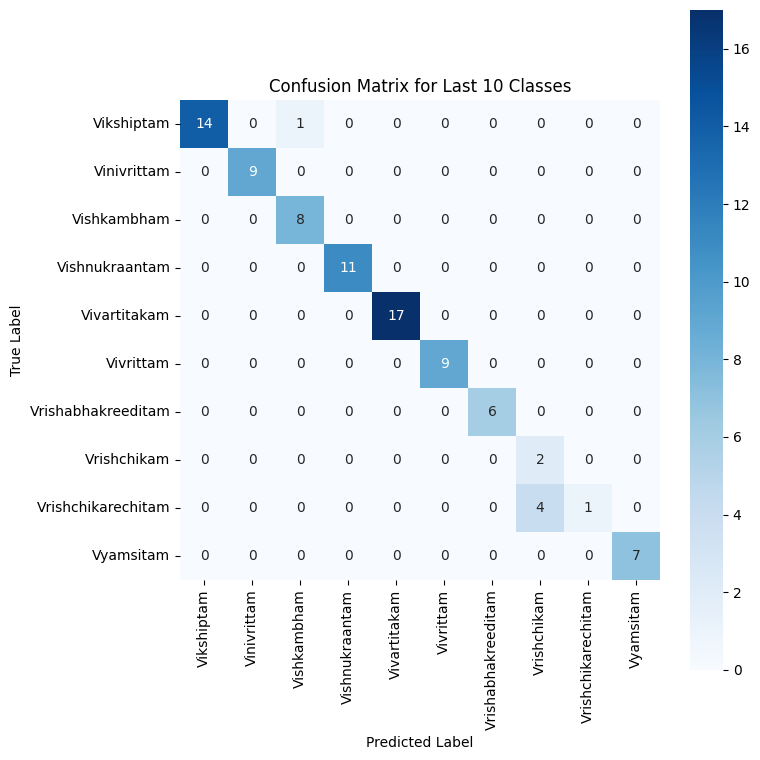

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred contain your true and predicted labels respectively
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Select the last 10 classes (or any subset of the confusion matrix)
subset_cm_last_10 = cm[-10:, -10:]

# Get the last 10 class names
last_10_class_names = class_names[-10:]

# Plot the confusion matrix for the last 10 classes
plt.figure(figsize=(8, 8))
sns.heatmap(subset_cm_last_10, annot=True, fmt='d', cmap='Blues', xticklabels=last_10_class_names, yticklabels=last_10_class_names, square=True)
plt.title('Confusion Matrix for Last 10 Classes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\aasis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


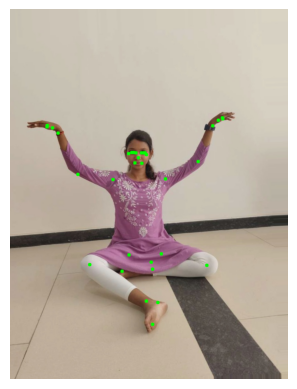

In [ ]:
import matplotlib.pyplot as plt
def plot_landmarks_on_image(image, landmarks):
    # Draw landmarks on the image
    for i in range(0, len(landmarks), 3):  # Every 3rd value corresponds to x, y, z
        x, y = int(landmarks[i] * image.shape[1]), int(landmarks[i + 1] * image.shape[0])
        cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
    
    # Display the image with landmarks
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example of plotting landmarks on an image
image_path = r"D:\Test-images\vivritam.jpg" # Use any image from your dataset
image = cv2.imread(image_path)
landmarks = extract_pose_landmarks(image)
plot_landmarks_on_image(image, landmarks)


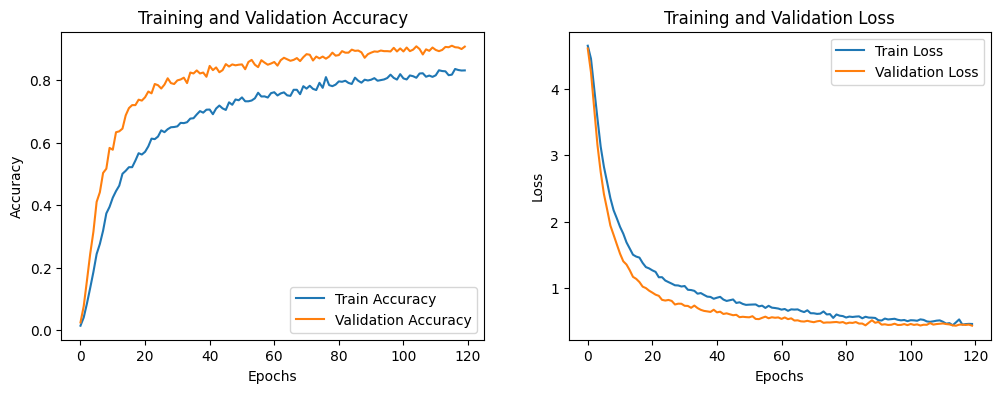

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


Trail2

In [7]:
import cv2
import mediapipe as mp
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Mediapipe setup
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

data_dir = r"D:\augmented_dataset\augmented_dataset"

# Function to extract landmarks
def extract_pose_landmarks(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = pose.process(img_rgb)
    
    if result.pose_landmarks:
        landmarks = []
        for landmark in result.pose_landmarks.landmark:
            landmarks.append([landmark.x, landmark.y, landmark.z])
        return np.array(landmarks).reshape(33, 3)  # Reshape to 2D for CNN
    else:
        return np.zeros((33, 3))  # Shape 33 x 3 (for x, y, z)

# Load dataset and extract landmarks
def load_dataset(data_dir):
    X = []
    y = []
    class_names = sorted(os.listdir(data_dir))

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            image = cv2.imread(img_path)

            landmarks = extract_pose_landmarks(image)
            X.append(landmarks)
            y.append(label)

    return np.array(X), np.array(y), class_names

X, y, class_names = load_dataset(data_dir)

# Reshape input to add the "channel" dimension
X = X[..., np.newaxis]  # Shape now (samples, 33, 3, 1) for CNN input

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train_cat = to_categorical(y_train, num_classes=len(class_names))
y_test_cat = to_categorical(y_test, num_classes=len(class_names))

# CNN Model Architecture with Adjusted Pooling
model = Sequential([
    Conv2D(16, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(33, 3, 1)),
    MaxPooling2D(pool_size=(2, 1)),  # Smaller pooling size to maintain dimensions in one direction
    Dropout(0.25),
    Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 1)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(len(class_names), activation='softmax')
])

# Compile the model
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=120, batch_size=16)

# Save and evaluate the model
model.save('cnn_pose_model2.h5')
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy}")


Epoch 1/120
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0100 - loss: 4.6699 - val_accuracy: 0.0135 - val_loss: 4.6545
Epoch 2/120
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0102 - loss: 4.6330 - val_accuracy: 0.0183 - val_loss: 4.6396
Epoch 3/120
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0194 - loss: 4.6078 - val_accuracy: 0.0203 - val_loss: 4.5863
Epoch 4/120
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0197 - loss: 4.5340 - val_accuracy: 0.0492 - val_loss: 4.4130
Epoch 5/120
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0450 - loss: 4.3537 - val_accuracy: 0.0975 - val_loss: 4.1246
Epoch 6/120
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0613 - loss: 4.0982 - val_accuracy: 0.1197 - val_loss: 3.6585
Epoch 7/120
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0992 - loss: 3.7360 - val_accuracy: 0.1747 - val_loss: 3.2329
Epoch 8/120
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1537 - loss: 3.4279 - val_accu

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8455 - loss: 0.6273
Test Accuracy: 0.8214285969734192


In [4]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import mediapipe as mp
import os

# Load the trained model
model = load_model('cnn_pose_model3.h5')

# Mediapipe setup
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Class names (ensure these match the class names used during training)
class_names = sorted(os.listdir(r"D:\augmented_dataset\augmented_dataset"))  # Same folder structure used for training

# Output folder where the images with predictions will be saved
output_folder = "predicted_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to extract landmarks from an image (same as used during training)
def extract_pose_landmarks(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = pose.process(img_rgb)
    
    if result.pose_landmarks:
        landmarks = []
        for landmark in result.pose_landmarks.landmark:
            landmarks.append([landmark.x, landmark.y, landmark.z])
        return np.array(landmarks).reshape(33, 3)  # Reshape to 2D for CNN
    else:
        return np.zeros((33, 3))  # Shape 33 x 3 (for x, y, z)

# Function to predict the pose and save the result
def predict_and_save(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    
    # Extract pose landmarks
    landmarks = extract_pose_landmarks(image)
    
    # Reshape the landmarks for model input
    landmarks = landmarks.reshape(1, 33, 3, 1)  # Reshape to match CNN input shape (batch, height, width, channels)
    
    # Predict the class (pose)
    prediction = model.predict(landmarks)
    
    # Get the class with the highest probability
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class_index]
    
    # Display the predicted class name on the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image, f'Predicted: {predicted_class_name}', (30, 30), font, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Save the image with the prediction result
    output_path = os.path.join(output_folder, os.path.basename(image_path))  # Save to the output folder
    cv2.imwrite(output_path, image)
    print(f"Saved prediction for {image_path} as {output_path}")

# Function to process a folder of test images
def process_test_folder(test_folder):
    # Get all image files from the folder
    for img_name in os.listdir(test_folder):
        img_path = os.path.join(test_folder, img_name)
        
        # Process only if it's a valid image file
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            predict_and_save(img_path)

# Test with a folder of images
test_folder = r"D:\Test-images"  # Replace with the path to the folder containing test images
process_test_folder(test_folder)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

C:\Users\aasis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Saved prediction for D:\Test-images\arglam.jpg as predicted_images\arglam.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Saved prediction for D:\Test-images\caturam.jpg as predicted_images\caturam.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Saved prediction for D:\Test-images\chinam.jpg as predicted_images\chinam.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Saved prediction for D:\Test-images\dandakarechi.jpg as predicted_images\dandakarechi.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Saved prediction for D:\Test-images\img1.jpg as predicted_images\img1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Saved prediction for D:\Test-images\katibhran.jpg as predicted_images\katibhran.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Saved prediction for D:\Test-images\kuncitam.jpg as predicted_images\kuncitam.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Saved prediction for D:\Test-images\lolitm.jpg as predicted_images\lolitm.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Saved predict

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


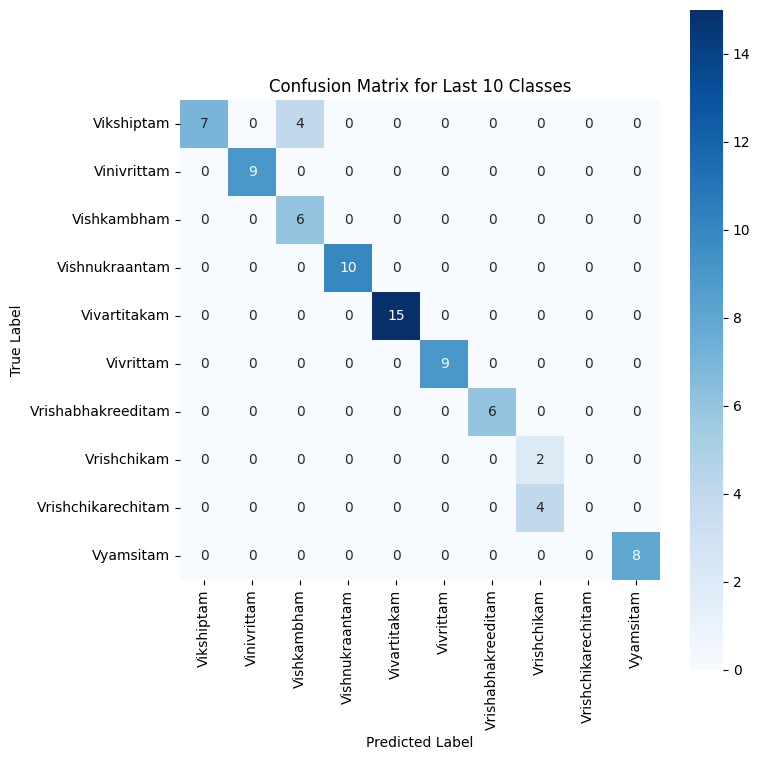

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred contain your true and predicted labels respectively
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Select the last 10 classes (or any subset of the confusion matrix)
subset_cm_last_10 = cm[-10:, -10:]

# Get the last 10 class names
last_10_class_names = class_names[-10:]

# Plot the confusion matrix for the last 10 classes
plt.figure(figsize=(8, 8))
sns.heatmap(subset_cm_last_10, annot=True, fmt='d', cmap='Blues', xticklabels=last_10_class_names, yticklabels=last_10_class_names, square=True)
plt.title('Confusion Matrix for Last 10 Classes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


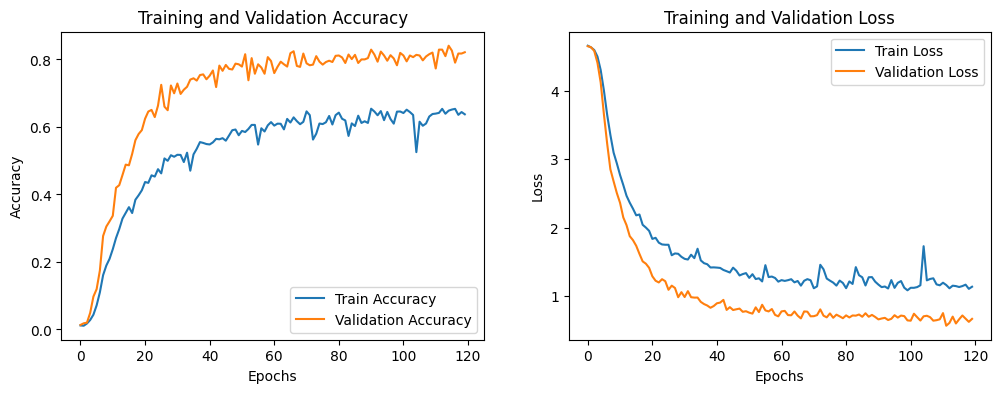

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


Trial3

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Mediapipe setup
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

data_dir = r"D:\augmented_dataset\augmented_dataset"

# Function to extract landmarks
def extract_pose_landmarks(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = pose.process(img_rgb)
    
    if result.pose_landmarks:
        landmarks = []
        for landmark in result.pose_landmarks.landmark:
            landmarks.append([landmark.x, landmark.y, landmark.z])
        return np.array(landmarks).reshape(33, 3)  # Reshape to 2D for CNN
    else:
        return np.zeros((33, 3))  # Shape 33 x 3 (for x, y, z)

# Load dataset and extract landmarks
def load_dataset(data_dir):
    X = []
    y = []
    class_names = sorted(os.listdir(data_dir))

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            image = cv2.imread(img_path)

            landmarks = extract_pose_landmarks(image)
            X.append(landmarks)
            y.append(label)

    return np.array(X), np.array(y), class_names

X, y, class_names = load_dataset(data_dir)

# Reshape input to add the "channel" dimension
X = X[..., np.newaxis]  # Shape now (samples, 33, 3, 1) for CNN input

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train_cat = to_categorical(y_train, num_classes=len(class_names))
y_test_cat = to_categorical(y_test, num_classes=len(class_names))

# CNN Model Architecture with Padding
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(33, 3, 1)),
    MaxPooling2D(pool_size=(2, 1)),  # Smaller pooling size to maintain dimensions
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 1)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Initialize RMSprop optimizer with suggested hyperparameters
optimizer = RMSprop(learning_rate=0.001, rho=0.9)  # You can try other values like 0.0005 or rho=0.8

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=120,
    batch_size=32,
    callbacks=[reduce_lr, early_stopping]
)

model.save('cnn_pose_model3.h5')

loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy}")

C:\Users\aasis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\aasis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.0145 - loss: 4.6678 - val_accuracy: 0.0145 - val_loss: 4.6372 - learning_rate: 0.0010
Epoch 2/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0203 - loss: 4.5831 - val_accuracy: 0.0637 - val_loss: 4.4700 - learning_rate: 0.0010
Epoch 3/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0391 - loss: 4.3851 - val_accuracy: 0.0830 - val_loss: 4.1415 - learning_rate: 0.0010
Epoch 4/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0847 - loss: 3.9836 - val_accuracy: 0.1293 - val_loss: 3.7397 - learning_rate: 0.0010
Epoch 5/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1189 - loss: 3.6382 - val_accuracy: 0.2027 - val_loss: 3.2677 - learning_rate: 0.0010
Epoch 6/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1556 - loss: 3.2846 - val_accuracy: 0.2934 - val_loss: 2.9388 - learning_rate: 0.0010
Epoch 7/120
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1985 - loss: 3.0161 - 

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8949 - loss: 0.4838
Test Accuracy: 0.88416987657547


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


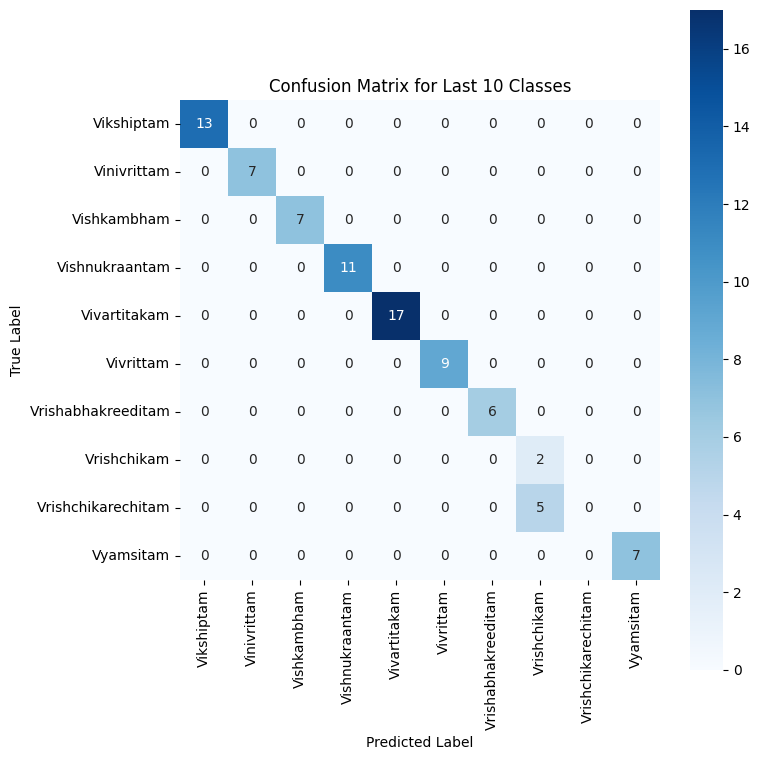

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred contain your true and predicted labels respectively
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Select the last 10 classes (or any subset of the confusion matrix)
subset_cm_last_10 = cm[-10:, -10:]

# Get the last 10 class names
last_10_class_names = class_names[-10:]

# Plot the confusion matrix for the last 10 classes
plt.figure(figsize=(8, 8))
sns.heatmap(subset_cm_last_10, annot=True, fmt='d', cmap='Blues', xticklabels=last_10_class_names, yticklabels=last_10_class_names, square=True)
plt.title('Confusion Matrix for Last 10 Classes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


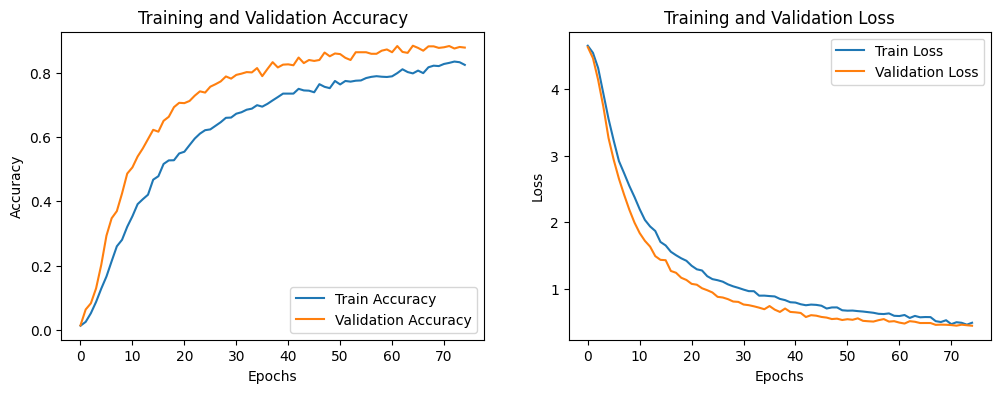

In [3]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
